<a href="https://colab.research.google.com/github/bhagu/1000-Days-Of-Code/blob/main/Preparing_Data_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data For Machine Learning - Pluralsight Course

#Understanding the Need for Data Preparation

##Module Focus
Insufficient Data;
Excessive or overly complex data;
Non-representative data, missing data, outlier;
Oversampling and understanding;
Overfitting and underfitting models;

### Insufficient Data
Leads to Overfitting/ Underfitting

No great solution for insufficient data

Simply need to find more data sources

Dealing with Small Datasets

Model complexity - Simpler model with fewer model parameters, Less susceptible to overfitting, e.g. Naive Bayes classifier, logistic regression, Use ensemble techniques

Transfer learning - the practice of reusing a trained neural network that solves a problem similar to yours, usually leaving the network architeture unchanged and re-using some of all of the model weights

Data augmentation - Increase the number of training samples, Perturbed images are a form of data augmentation, Scaling, rotation, affine transforms, Makes CNN training more robust

Synthetic data - Artificially generate samples which mimic real world data


###Too Much Data
Data might be excessive in 2 ways

- Curse of dimensionality: Too many columns/features
- Outdated historical data: Too many rows

Concept Drift: The relationship between features (X-variables) and labels (Y-variables) changes over time; ML models fail to keep up, and consequently their performance suffers

Outdated historical data: If not eliminated, leads to concept drift;
This is a serious issue in specific applications
- Financial trading

Usually require human expert to judge which rows to leave out

Curse of dimensionality: 2 specific problems arise when too much data is available
- Deciding which data is actually relevant
- Aggregating very low-level data into useful features

Easier problem to solve:
- Feature selection: Deciding which data is actually relevant
- Feautre engineering: Aggregating very low-level data into useful features
- Dimensionality reduction: Reduce complexity without losing information

Concept Hierarchy: A mapping that combines very low-level features (e.g. latitudes and longitudes) into more general, usable features (e.g. zip codes)




###Non-Representative Data
Data is inaccurate, small errors have significant impact

Account for data cleaning and processing time

Data is not representative of the real world i.e. biased

Leads to biased models that perform poorly in practice

Mitigate using oversampling and undersampling

###Duplicate Data
If data can be flagged as duplicate, problem relatively easy to solve
- Simply de-duplicate

Can be hard to identify in some applications
- Real-time streaming

###Missing Data and Outliers
Data cleaning procedures can help significantly mitigate the effects of
- Missing data
- Outliers

Missing Data
- Deletion
- Imputation

Deletion / Listwise Deletion: Delete an entire record (row) if a single value (column) is missing. Simple, but can lead to bias

- Most common method in practices
- Can reduce sample size significanlty
- If values are not missing at random, can intriduce significant bias

Imputation: Fill in missing values, rather than deleting records with missing values. Missing values are inferred from known data.

- Methods range from very simple to very complex
- Simplest method - Use column average
- Can interpolate from nearby values 
- Can even build model to predict missing values

Univariate Imputation: rely only on known values in same feature

Multivariate imputation: Use all known data to infer missing value
- Construct regression models from other columns to predict this column
- Iteratively repeat for all columns

Hot-deck Imputation:
- Sort records based on any criteria
- for each missing value, use immediately prior available value
- "Last Observation Carried Forward"
- For time-series data, equivalent to assuming no change since last measurement

Mean Substitution:
- For each missing value, substitute mean of all available values
- Has effect of weakening correlations between columns
- Can be problematic when bivariate analysis is required

Regression:
- Fit model to predict missing column based on other column values
- Tends to strengthen correlations
- Regression and mean substitution have complementary strengths

Outliers
- Identifying Outliers
  - Distance from Mean
  - Distance from fitted line
- Coping with Outliers
  - Drop
  - Cap/Floor
  - Set to mean

Identifying Outliers

More than 3 Standard deviation - Distance from mean

Might also be data points that do not fit into the same relationship as the rest of the data


Coping with Outliers
- Always start by scrutinizing outliers
- If erroneous observation
  - Drop if all attributes of that point are erroneous
  - Set to mean if only one attribute is erroneous
- If genuine, legitimate outlier
  - Leave as-is if model is not distorted
  - Cap/Floor if model is distorted
    - Need to first standardize data
    - Cap positive outliers to +3
    - Floor negative outliers to -3

###Oversampling and Undersampling
Techniques that intentionally add bias to the data in order to make it balanced

Balacing Datasets
- Oversampling uncommon x or y values
- Undersampling of common x or y values

Forcibly Balanced Datasets

Oversampling and undersampling tend to
- Reduce accuracy
- Increase precision and recall

Related techniques include
- Case studies
- Stratified sampling

###Overfitting and Underfitting
Overfitting
- Model has memorized the training data
- Low training error
- Doesn't work well in the real world
- High test error

Underfitting
- Model unable to capture relationships in data
- Performs poorly on the training data
- Model too 'simple' to be useful

#Implementing Data Cleaning and Transformation

##Handling Missing Values

In [1]:
import sklearn

import pandas as pd
import numpy as np

import datetime

In [2]:
print(sklearn.__version__)

0.22.2.post1


In [3]:
print(np.__version__)

1.19.5


In [4]:
print(pd.__version__)

1.1.5


In [5]:
automobile_df = pd.read_csv("cars.csv")

automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [6]:
automobile_df.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin', 'bore', 'stroke',
       'compression-ratio'],
      dtype='object')

In [7]:
automobile_df.describe()

,MPG,Horsepower,bore,stroke
count,385.000000,394.000000,394.000000,394.000000
mean,23.551429,104.337563,3.305025,3.289289
std,7.821598,38.449600,0.270336,0.271165
min,9.000000,46.000000,2.540000,2.070000
25%,17.500000,75.000000,3.080000,3.150000
50%,23.000000,92.500000,3.270000,3.350000
75%,29.000000,125.000000,3.580000,3.400000
max,46.600000,230.000000,3.940000,4.170000


In [8]:
  automobile_df.shape

(394, 12)

In [9]:
automobile_df = automobile_df.replace('?', np.nan)

automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [10]:
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [11]:
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [12]:
automobile_df = automobile_df.dropna()

In [13]:
 automobile_df.shape

(387, 12)

In [14]:
automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [15]:
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [16]:
automobile_df.sample(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
391,dodge rampage,32.0,4,135,84,2295,11.6,1982-1985,US,3.15,3.29,9.4
390,vw pickup,44.0,4,97,52,2130,24.6,1982,Europe,3.15,3.29,9.4
210,cadillac seville,16.5,8,350,180,4380,12.1,1976,US,3.01,3.40,23
48,mercury capri 2000,23.0,4,122,86,2220,13,1971,US,3.63,4.17,8.1
330,datsun 280-zx,32.7,6,168,132,2910,11.4,1980,Japan,2.91,3.41,9.2


In [17]:
automobile_df.drop(['Model'], axis=1, inplace=True)

In [18]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
383,38.0,6,262,85,3015,17,1982-1985,US,3.17,3.46,7.5
198,18.0,6,250,78,3574,21,1976,US,3.62,3.15,7.5
361,20.2,6,200,88,3060,17.1,1981,US,3.43,3.64,22
332,35.0,4,122,88,2500,15.1,1980,Europe,3.15,3.58,9
186,16.0,8,318,150,4190,13,1976,US,3.19,3.40,9


In [19]:
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], axis=1, inplace=True)

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


##Cleaning Data

In [20]:
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [21]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [22]:
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False)

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [23]:
automobile_df['Year'].isnull().values.any()

False

In [24]:
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [25]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [26]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']

automobile_df.drop(['Year'], axis=1, inplace=True)

automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
74,14.0,8,318,150,4077,14,US,49
201,29.5,4,97,71,1825,12.2,Europe,45
36,18.0,6,232,100,3288,15.5,US,50
250,19.2,6,231,105,3535,19.2,US,43
165,29.0,4,97,75,2171,16,Japan,46


In [27]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [28]:
automobile_df['Cylinders'].isnull().values.any()

False

In [29]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [30]:
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [31]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

cmean = cylinders.astype(int).mean()

In [32]:
cmean

5.420634920634921

In [33]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [34]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [35]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [36]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [37]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [38]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [39]:
automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [40]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'),
                                   'US',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [41]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'),
                                   'Japan',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [42]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'),
                                   'Europe',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [43]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [44]:
automobile_df.to_csv('cars_processed.csv', index=False)

In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

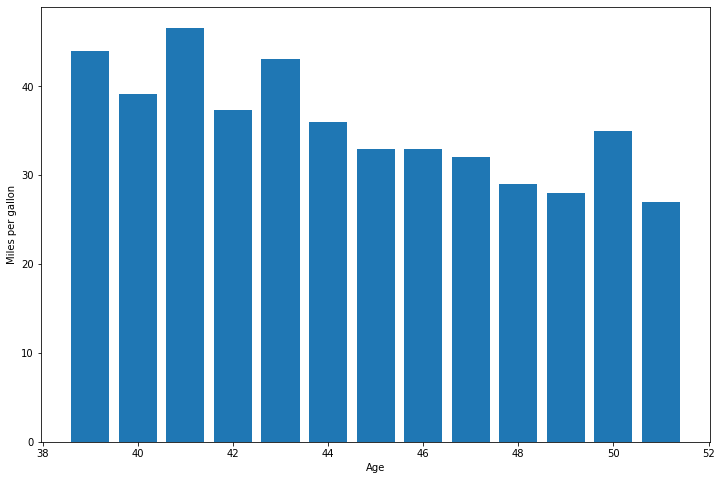

In [46]:
plt.figure(figsize=(12,8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

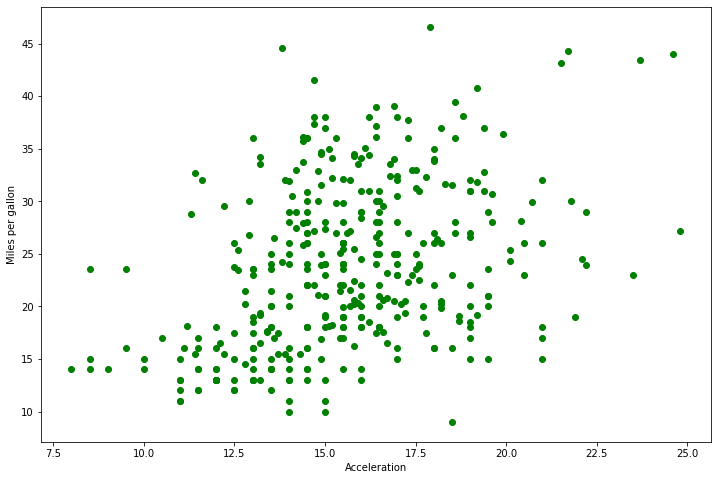

In [48]:
plt.figure(figsize=(12,8))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

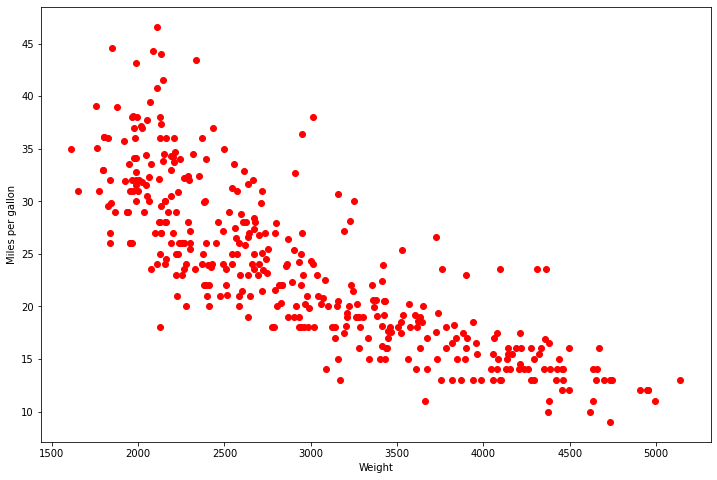

In [49]:
 plt.figure(figsize=(12,8))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

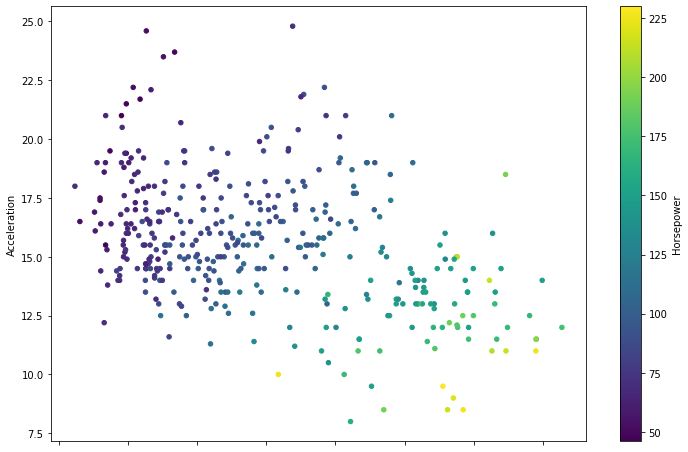

In [50]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(12,8));

Text(0, 0.5, 'Miles per gallon')

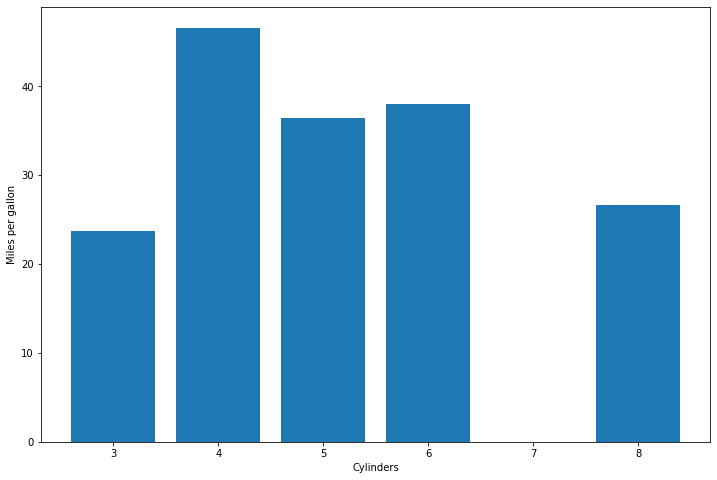

In [52]:
plt.figure(figsize=(12,8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

In [53]:
automobile_df.drop(['Cylinders', 'Origin'], axis=1, inplace=True)

automobile_df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
109,22.000000,108.0,94,2379,16.5,48
257,20.800000,200.0,85,3070,16.7,43
264,30.000000,98.0,68,2155,16.5,43
322,40.800000,85.0,65,2110,19.2,41
89,12.000000,429.0,198,4952,11.5,48
210,16.500000,350.0,180,4380,12.1,45
290,18.500000,360.0,150,3940,13.0,42
81,23.551429,120.0,97,2506,14.5,49
285,16.500000,351.0,138,3955,13.2,42
189,22.000000,225.0,100,3233,15.4,45


In [54]:
cars_corr = automobile_df.corr()

cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


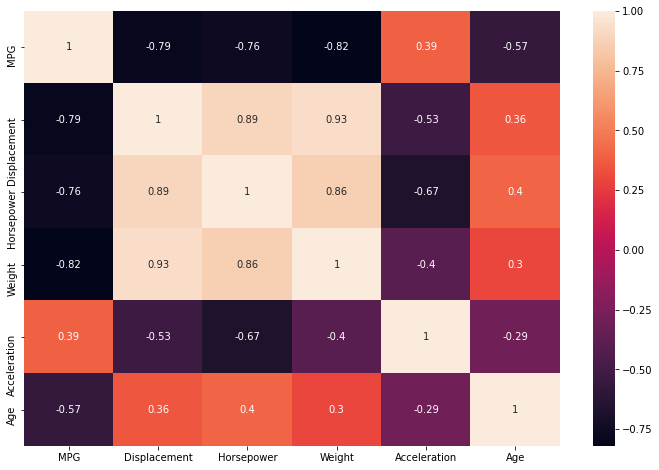

In [57]:
import seaborn as sns

fig, ax =plt.subplots(figsize = (12,8))

sns.heatmap(cars_corr, annot=True)

#Baseline Regression Model

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
automobile_df = pd.read_csv('cars_processed.csv')

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [65]:
automobile_df.shape

(387, 8)

In [66]:
automobile_df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Origin', 'Age'],
      dtype='object')

In [67]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [68]:
automobile_df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.746023,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Cylinders,-0.746023,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,-0.788492,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


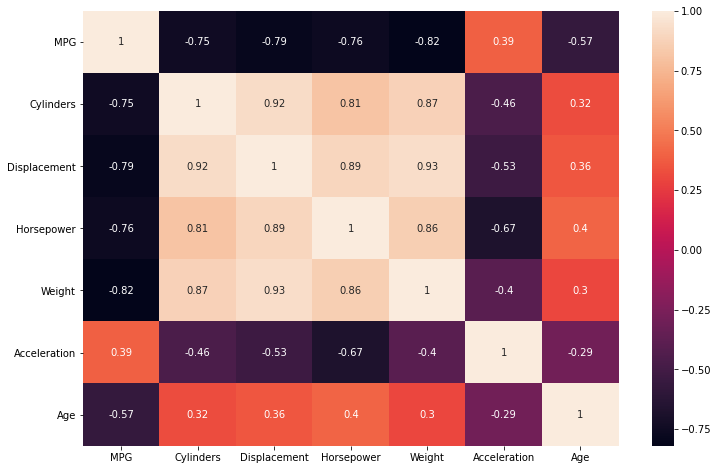

In [70]:
import seaborn as sns

fig, axs = plt.subplots(figsize = (12,8))

sns.heatmap(automobile_df.corr(), annot=True)

In [71]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [72]:
X = automobile_df[['Age']]
Y = automobile_df['MPG']

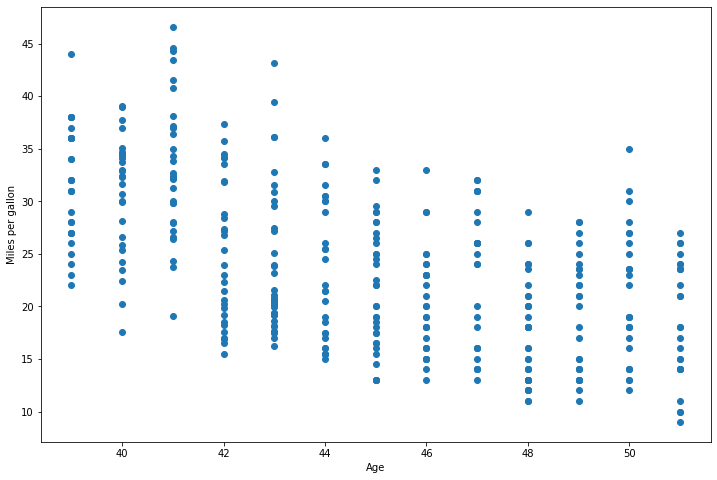

In [74]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

plt.show()

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [76]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [77]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.2840763343094469


In [78]:
y_pred = linear_model.predict(x_test)

In [79]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.3636951396338174


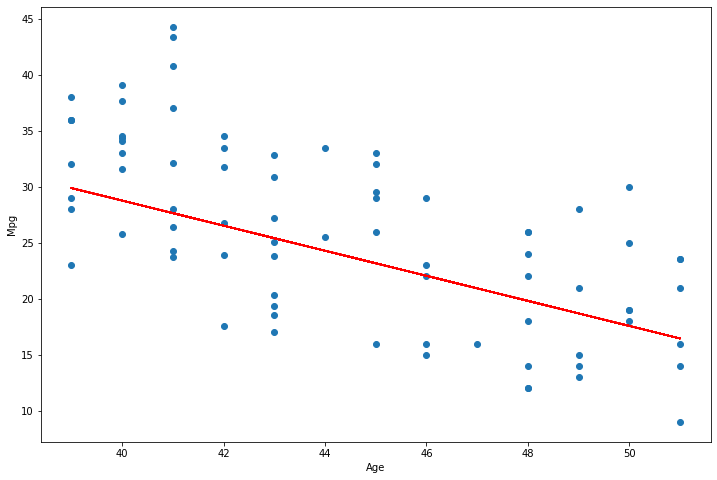

In [80]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [81]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.573342726007966
Testing score:  0.5948281848308257


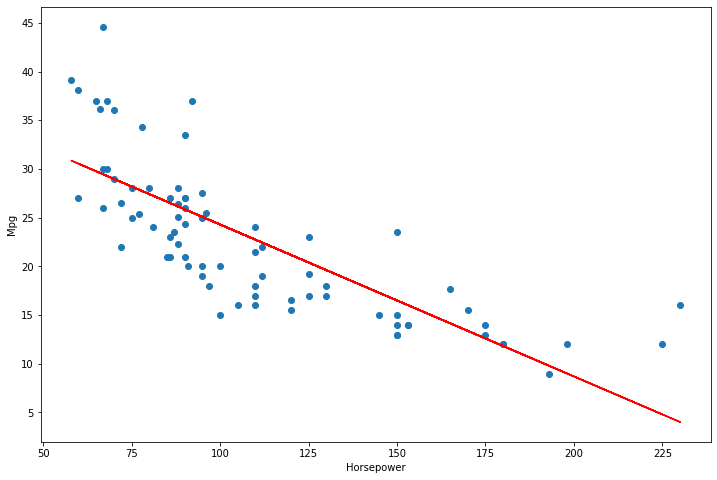

In [82]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [85]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
1,16.000000,8,304.0,150,3433,12.0,US,51
2,17.000000,8,302.0,140,3449,10.5,US,51
3,14.000000,8,454.0,220,4354,9.0,US,51
4,23.551429,8,440.0,215,4312,8.5,US,51


In [86]:
automobile_df = pd.get_dummies(automobile_df, columns=['Origin'])

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age,Origin_Europe,Origin_Japan,Origin_US
0,18.000000,8,307.0,130,3504,12.0,51,0,0,1
1,16.000000,8,304.0,150,3433,12.0,51,0,0,1
2,17.000000,8,302.0,140,3449,10.5,51,0,0,1
3,14.000000,8,454.0,220,4354,9.0,51,0,0,1
4,23.551429,8,440.0,215,4312,8.5,51,0,0,1


In [88]:
automobile_df.shape

(387, 10)

In [89]:
X = automobile_df.drop('MPG', axis=1)
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print("Testing score: ", r2_score(y_test, y_pred))

Training score:  0.7984256342779664
Testing score:  0.8195669729040392
